In [ ]:
import csv

filename = 'data.csv'
data = []

try:
    with open(filename) as f:
        reader = csv.reader(f)
        c = 0
        for row in reader:
            if c == 0:
                header = row
            else:
                data.append(row)
            c += 1
            
except csv.Error as e:
    print("Error reading CSV file at line %s: %s" % (reader.line_num, e))
    sys.exit(-1)

if header:
    print(header) 
    print('==================')

for datarow in data:
    print(datarow)

In [ ]:
import xlrd
from pprint import pprint

file = 'ch02-xlsxdata.xlsx'
wb = xlrd.open_workbook(filename=file)
sheet_names = wb.sheet_names()
ws = wb.sheet_by_name(sheet_names[0])

dataset = []
for r in range(ws.nrows):
    for j in range(ws.ncols):
        dataset.append(ws.cell(r,j).value)

pprint(dataset)

In [ ]:
from datetime import datetime
from xlrd import open_workbook,xldate_as_tuple
import xlrd

file = 'ch02-xlsxdata.xlsx'
wb = xlrd.open_workbook(filename=file)
sheet_names = wb.sheet_names()
ws = wb.sheet_by_name(sheet_names[0])

cell = ws.cell(1,0)
print(cell)
print(cell.value)
print(cell.ctype)
if cell.ctype == xlrd.XL_CELL_DATE:
    data_value = xldate_as_tuple(cell.value,wb.datemode)
    print(datetime(*data_value))
    

In [ ]:
import string
import random

ROWS = 1000000
SAMPLE = '012345678901234567890123456'
F1 = 9
F2 = F1 + 13
F3 = F2 + 4

f = open("collegeAll.data",'w',encoding='utf-8')
for r in range(ROWS):
    t = ''.join(random.sample(SAMPLE,len(SAMPLE)))
    f.write(t[0:F1] + " " + t[F1:F2] + " " + t[F2:F3] + '\n')
    print(t[0:F1], t[F1:F2], t[F2:F3])

f.close()

In [ ]:
import struct
import string

datafile = "collegeAll.data"
mask = '9s14s5s'

f = open(datafile, 'r')
for line in f:
    fields = struct.Struct(mask).unpack_from(bytes(line,'utf-8'))
    print("fields: ", [field.strip() for field in fields])

In [ ]:
import csv

filename = 'data.tab'
data = []

try:
    with open(filename) as f:
        reader = csv.reader(f, dialect = csv.excel_tab)
        c = 0
        for row in reader:
            if c == 0:
                header = row
            else:
                data.append(row)
            c += 1
            
except csv.Error as e:
    print("Error reading CSV file at line %s: %s" % (reader.line_num, e))
    sys.exit(-1)

if header:
    print(header) 
    print('==================')

for datarow in data:
    print(datarow)

In [ ]:
import requests
from pprint import pprint

url = 'https://api.github.com/events'
r = requests.get(url)
json_obj = r.json()

repos = set() # we want just unique urls
for entry in json_obj:
    try:
        repos.add(entry['repo']['url'])
    except KeyError as e:
        print("No key %s. Skipping..." % (e))
 
pprint(repos)

In [ ]:
import os
import sys
import argparse
try:
    import StringIO as StringIO
except:
    import io as StringIO
import struct
import json
import csv
from xlwt import Workbook

def import_data(import_file):
    mask = '9s14s5s'
    data = []
    with open(import_file, 'r') as f:
        for line in f:
            fields = struct.Struct(mask).unpack_from(bytes(line,'utf-8'))
            data.append(list(field.strip() for field in feilds))
    return data
        
def write_data(data, export_format):
    if export_format == 'csv':
        return write_csv(data)
    elif export_format == 'json':
        return write_json(data)
    elif export_format == 'xlsx':
        return write_xlsx(data)
    else:
        raise Exception("Illegal format defined")

def write_csv(data):
    f = StringIO.StringIO()
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)
    return f.getvalue()

def write_json(data):
    j = json.dumps(data)
    return j

def write_xlsx(data):
    workbook = Workbook()
    sheet = workbook.add_sheet('sheet1')
    row = 0
    for line in data:
        col = 0
        for datum in line:
            print(datum)
            sheet.write(row, col, datum)
            col += 1
        row += 1
        if(row > 65535):
            print("hit limit of # of rows in one sheet (65535)")
            break
    f = StringIO.StringIO()
    Workbook.save(f)
    return f.getvalue()

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument("import_file", help='path to a fixed-width data file.')
    parser.add_argument("export_format", help='Export format: csv, json, xlsx.')
    args = parser.parse_args()

    if args.import_file is None:
        print("You myst specify path to import from.", file = sys.stderr)
        sys.exit(1)
    if args.export_format not in ('csv','json','xlsx'):
        print("You must provide valid export file format.", file = sys.stderr)
        sys.exit(1)
    if not os.path.isfile(args.import_file):
        print("Given path is not a file: %s" %(args.import_file), file = sys.stderr)
        sys.exit(1)

    data = import_data(args.import_file)
    print(write_data(data, args.export_format))
        


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def is_outlier(points, threshold = 3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    
    median = np.median(points, axis=0)
    diff = np.sum((points-median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > threshold

x = np.random.random(100)
buckets = 50
x = np.r_[x, -49, 95, 100, -100]
filtered = x[~is_outlier(x)]

plt.figure()
plt.subplot(211)
plt.hist(x, buckets)
plt.xlabel("Raw")

plt.subplot(212)
plt.hist(filtered, buckets)
plt.xlabel("Cleaned")

plt.show()

In [ ]:
from pylab import *

spread = rand(50)*100
center = ones(25)*50
flier_high = rand(10)*100 + 100
flier_low = rand(10)* -100
data = concatenate( (spread, center, flier_high, flier_low),0)

subplot(311)
boxplot(data, 0 ,'gx')

subplot(312)
spread_1 = concatenate( (spread, flier_high, flier_low), 0)
center_1 = ones(70)*25
scatter(center_1, spread_1)
xlim([0,50])

subplot(313)
center_2 = rand(70)*50
scatter(center_2,spread_1)
xlim([0,50])

show()

In [ ]:
from pylab import *

x = 1e6*rand(1000)
y = rand(1000)

subplot(211)
scatter(x,y)
xlim(1e-6,1e6)

subplot(212)
scatter(x,y)
xscale('log')
xlim(1e-6, 1e6)

In [ ]:
import time
import os
import sys

if len(sys.argv) != 2:
    print(sys.stderr)
    print( "Please specify filename to read")

filename = 'ch02-xlsxdata.xlsx'
if not os.path.isfile(filename):
    print(sys.stderr) 
    print("Given file: \"%s\" is not a file" % filename)

with open(filename,'r') as file:
    filesize = os.stat(filename)[6]
    file.seek(filesize)

    while True:
        where = file.tell()
        line = file.readline()
        if not line:
            time.sleep(1)
            file.seek(where)
        else:
            print(line)

In [ ]:
import scipy.misc
import matplotlib.pyplot as plt

lena = scipy.misc.ascent()
plt.gray()
plt.imshow(lena)
plt.colorbar()
plt.show()

print(lena.shape)
print(lena.max())
print(lena.dtype)

In [ ]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt

bug = Image.open('stinKbug.png')
arr = numpy.array(bug.getdata(), numpy.uint8).reshape(bug.size[1], bug.size[0], 3)

plt.gray()
plt.imshow(arr)
plt.colorbar()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy
import scipy.misc

bug = numpy.array(plt.imread('stinkbug.png'))
print(bug.shape)
bug = bug[:,:,0]
plt.figure()
plt.gray()
plt.subplot(121)
plt.imshow(bug)

zbug = bug[100:350,140:350]
plt.subplot(122)
plt.imshow(zbug)
plt.show()

In [ ]:
import pylab
import random

SAMPLE_SIZE = 100000
random.seed()
real_rand_vars = []
real_rand_vars = [random.random() for val in range(SAMPLE_SIZE)]
pylab.hist(real_rand_vars,10)

pylab.xlabel("Number range")
pylab.ylabel("Count")

pylab.show()

In [ ]:
import pylab
import random

duration = 100
mean_inc = 0.2
std_dev_inc = 1.2
x = range(duration)
y = []
price_today = 0
for i in x:
    next_delta = random.normalvariate(mean_inc, std_dev_inc)
    price_today += next_delta
    y.append(price_today)

pylab.plot(x,y)
pylab.xlabel("Time")
pylab.ylabel("Value")
pylab.show()

In [ ]:
import random
import matplotlib
import matplotlib.pyplot as plt

SAMPLE_SIZE = 1000
buckets = 100

plt.figure()
matplotlib.rcParams.update({'font.size':7})

plt.subplot(621)
plt.xlabel("ranodm.random")
res = [random.random() for _ in range(1,SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(622)
plt.xlabel("random.uniform")
res = [random.uniform(1,SAMPLE_SIZE) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(623)
plt.xlabel("random.trangular")
res = [random.triangular(1,SAMPLE_SIZE) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(624)
plt.xlabel("random.betaveriate")
res = [random.betavariate(1,10) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(625)
plt.xlabel("random.expovariate")
lambd = 1.0/((SAMPLE_SIZE + 1)/ 2.0)
res = [random.expovariate(lambd) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(626)
plt.xlabel("random.gammavariate")
res = [random.gammavariate(1,10) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(627)
plt.xlabel("random.lognormvariate")
res = [random.lognormvariate(1,0.5) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(628)
plt.xlabel("random.normalvariate")
res = [random.normalvariate(1,0.5) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.subplot(629)
plt.xlabel("random.paretovariate")
res = [random.paretovariate(1) for _ in range(1, SAMPLE_SIZE)]
plt.hist(res, buckets)

plt.tight_layout()
plt.show()

In [ ]:
from pylab import *
from numpy import *

def moving_average(interval, window_size):
    window = ones(int(window_size))/ float(window_size)
    return convolve(interval, window, 'same')

t = linspace(-4, 4, 100)
y = sin(t) + randn(len(t)) * 0.1
plot(t, y, 'k.')

y_av = moving_average(y, 10)
plot(t, y_av, 'r')
xlabel("Time")
ylabel("Value")
grid(True)
show()

In [ ]:
import numpy
from numpy import *
from pylab import *

WINDOWS = ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
def smooth(x, window_len = 11, window = 'hanning'):
    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension array")
    if x.size < window_len:
        raise ValueError("input vector needs to bigger than window size")

    if window_len < 3:
        return x

    if not window in WINDOWS:
        raise ValueError("window is one of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman' " )

    s = numpy.r_[x[window_len-1 : 0: -1], x, x[-1:-window_len: -1]]
    if window == 'flat':
        w = eval('numpy.' + window + '(window_len)')
        y = numpy.convolve(w/w.sum(), s, mode = 'valid')
        return y

t = linspace(-4, 4, 100)
x = sin(t)
xn = x + randn(len(t))*0.1
y = smooth(x)
ws = 31
subplot(211)
plot(ones(ws))

for w in WINDOWS[1:]:
    #eval('plot(' + w + '(ws) )')
    eval('plot('+w+'(ws) )')
axis([0, 30, 0, 1.1])
legend(WINDOWS)
title("Smoothing window")

subplot(212)
plot(x)
plot(xn)
for x in WINDOWS:
    plot(smooth(xn, 10, w))
    
l = ['original signal', 'signal with noise']
l.extend(WINDOWS)
legend(l)
title("Smooth signal")

show()

In [ ]:
import numpy
from numpy import *
from pylab import *

# possible window type
WINDOWS = ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']
# if you want to see just two window type, comment previous line,
# and uncomment the following one
# WINDOWS = ['flat', 'hanning']

def smooth(x, window_len=11, window='hanning'):
    """
    Smooth the data using a window with requested size.
    Returns smoothed signal.
    x          -- input signal
    window_len -- lenght of smoothing window
    window     -- type of window: 'flat', 'hanning', 'hamming', 
                  'bartlett', 'blackman'
                  flat window will produce a moving average smoothing.
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.") 

    if window_len < 3:
        return x

    if not window in WINDOWS:
        raise ValueError("Window is one of 'flat', 'hanning', 'hamming', "
                          "'bartlett', 'blackman'")


    # adding reflected windows in front and at the end
    s=numpy.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]

    # pick windows type and do averaging
    if window == 'flat': #moving average
        w = numpy.ones(window_len, 'd')
    else:
        # call appropriate function in numpy
        w = eval('numpy.' + window + '(window_len)')

    # NOTE: length(output) != length(input), to correct this: 
    # return y[(window_len/2-1):-(window_len/2)] instead of just y.
    y = numpy.convolve(w/w.sum(), s, mode='valid')
    return y


# Get some evenly spaced numbers over a specified interval.
t = linspace(-4, 4, 100)

# Make some noisy sinusoidal
x = sin(t)
xn = x + randn(len(t))*0.1

# Smooth it
y = smooth(x)

# windows
ws = 31

subplot(211)
plot(ones(ws))


# plot for every windows
for w in WINDOWS[1:]:
    eval('plot('+w+'(ws) )')

# configure axis properties
axis([0, 30, 0, 1.1])

# add legend for every window
legend(WINDOWS)

title("Smoothing windows")

# add second plot
subplot(212)

# draw original signal 
plot(x)

# and signal with added noise
plot(xn)

# smooth signal with noise for every possible windowing algorithm
for w in WINDOWS:
    plot(smooth(xn, 10, w))

# add legend for every graph
l=['original signal', 'signal with noise']
l.extend(WINDOWS)
legend(l)

title("Smoothed signal")

show()

In [ ]:
import numpy as np
import pylab as p
import scipy.signal as signal

x = np.linspace(0, 1, 100)
x[3::10] = 1.5
p.plot(x)
p.plot(signal.medfilt(x,3))
p.plot(signal.medfilt(x,5))
p.legend(['original signal', 'length 3', 'length 5'])
p.show()


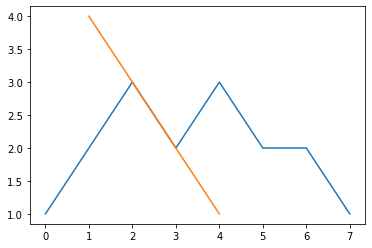

In [28]:
import matplotlib.pyplot as plt

plot([1,2,3,2,3,2,2,1])
plot([4,3,2,1],[1,2,3,4])

In [ ]:
from matplotlib.pyplot import *

x = [1,2,3,4]
y = [5,4,3,2]

figure()
subplot(231)
plot(x,y)
subplot(232)
bar(x,y)
subplot(233)
barh(x,y)
subplot(234)
bar(x,y)

y1 = [7,8,3,5]
bar(x, y1, bottom = y, color = 'r')
subplot(235)
boxplot(x)
subplot(236)
scatter(x,y)

show()

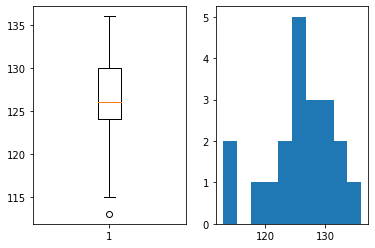

In [29]:
from pylab import *

dataset = [113, 115, 119, 121, 124,
           124, 125, 126, 126, 126,
           127, 127, 125, 129, 130,
           130, 131, 132, 133, 136]
subplot(121)
boxplot(dataset, vert = False)
subplot(122)
hist(dataset)
show()

In [ ]:
from matplotlib  import pyplot as  plt 

x = range(2,26,2)
y = [15,13,14.5,17,20,25,26,26,24,22,18,15]

plt.figure(figsize=(20,8),dpi=80)
plt.rc("lines", linewidth=2, color='g')
plt.plot(x, y)
plt.xticks(range(2,25))

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim=[0.5,4.5], ylim=[-2, 8], title = 'An Example Axes', ylabel = 'Y-Aixs', xlabel = 'X-Aixs')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
plt.rcParams['lines.color'] = 'r'
plt.plot(t,s)

c = np.cos(2 * np.pi * t)
plt.rcParams['lines.color'] = 'b'
plt.rcParams['lines.linewidth'] = '14'
plt.plot(t,c)

plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(211)
ax1 = fig.add_subplot(212)

plt.show()

In [ ]:
from openpyxl import load_workbook
from pprint import pprint

file = 'ch02-xlsxdata.xlsx'
wb = load_workbook(filename=file)
ws = wb.get_sheet_by_name('2014-2019一分一段表')

dataset = []
for r in ws.rows:
    col = []
    for c in r:
        col.append(c.value)
    dataset.append(col)

pprint(dataset)

In [ ]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.mplot3d import Axes3D

mpl.rcParams['font.size'] = 10
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for z in [2011, 2012, 2013, 2014]:
    xs = range(1,13)
    ys = 1000 * np.random.rand(12)
    
    color = plt.cm.Set2(random.choice(range(plt.cm.Set2.N)))
    ax.bar(xs, ys, zs=z, zdir='y', color=color, alpha=0.8)

ax.xaxis.set_major_locator(mpl.ticker.FixedLocator(xs))
ax.yaxis.set_major_locator(mpl.ticker.FixedLocator(ys))
ax.set_xlabel('Month')
ax.set_ylabel('Year')
ax.set_zlabel('Sales Net [usd]')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

V = [0, -5, -10, -15, -30, -40, -50, -60, -100]
SIZE = len(V)
U = np.zeros(SIZE)
y = np.ones(SIZE) 
x = [0, 5, 10, 15, 30, 40, 50, 60, 100]

plt.barbs(x, y, U, V, length=9)
plt.xticks(x)
plt.ylim(0.98, 1.05)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

Y, X = np.mgrid[0:5:100j, 0:5:100j]
U = X
# U = np.sin(X)
V = Y

print("X")
pprint(X)
print("Y")
pprint(Y)

plt.streamplot(X, Y, U, V)

plt.show()

In [ ]:
import tkinter
tkinter._test()

In [ ]:
from tkinter import *

root = Tk()
root.mainloop()

In [ ]:
from tkinter import *

root = Tk()
root.wm_title("我是标题")
root.mainloop()

In [ ]:
import turtle

t = turtle.Pen()
for x in range(100):
    t.circle(x)
    t.left(91)
